# Loan Acceptance Prediction

Read data and import libraries

In [1]:
import pandas as pd
import math as m
import numpy as np
path = "Dataset/Loan/train.csv"
data = pd.read_csv(path)

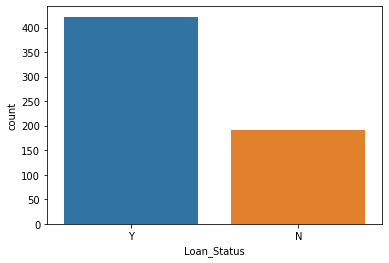

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.countplot(data['Loan_Status'])
plt.show()

Data preprocessing

In [3]:
from sklearn.preprocessing import StandardScaler
def preprocess(data,training=True,data_size=None,n_data=10):
    #remove NaN values
    data = data.fillna(0)
    #separate numerical and categorical data from each other
    numerical = data[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]]
    categorical = data[["Dependents","Education","Property_Area","Credit_History"]]
    #convert categorical to dummy variables
    dum_cate = pd.get_dummies(categorical)
    #combine numerical and cateforical data
    

    if training:
        data = pd.concat([dum_cate,numerical,data['Loan_Status']],axis=1)
        X_data = []
        y_data = []
        for i in range(0,n_data):
            Yes_data = data.loc[data['Loan_Status']=='Y'].sample(data_size,replace=False)
            No_data = data.loc[data['Loan_Status']=='N'].sample(data_size,replace=False)
            this_data = pd.concat([Yes_data,No_data],axis=0)
            this_X = this_data.iloc[:,:-1]
            this_y = this_data['Loan_Status']
            
            ss = StandardScaler()
            this_X = pd.DataFrame(data=ss.fit_transform(this_X),columns=this_X.columns)
            X_data.append(this_X)
            code_y = np.array([int(ele=='Y') for ele in this_y])
            y_data.append(code_y)
    else:
        data = pd.concat([dum_cate,numerical],axis=1)
        #standardize data
        ss = StandardScaler()
        X_data = pd.DataFrame(data=ss.fit_transform(data),columns=data.columns)
        y_data = []
    return X_data,y_data

In [6]:
import numpy as np
class Voting:
    def __init__(self,names_models):
        self.names_models = names_models
    def predict(self,X):
        preds = []
        for name,model in self.names_models:
            preds.append(model.predict(X))
        preds = np.array(preds)
#         print(preds)
        preds = np.mean(preds,axis=0)
#         print(preds.shape)
#         print(preds)
        return np.round(preds)


In [7]:
X_list,y_list = preprocess(data,training=True,data_size=30,n_data=300)

from sklearn.svm import SVR
names = []
models = []
i = 0
for X,y in zip(X_list,y_list):
    linear = SVR(kernel='sigmoid',gamma='auto')
    linear.fit(X,y)
    names.append(str(i))
    models.append(linear)
    i+=1

model = Voting(list(zip(names,models)))

In [8]:
test_path = "Dataset/Loan/test.csv"
test_data = pd.read_csv(test_path)

test_X,_ = preprocess(test_data,training=False)

test_data['Loan_Status'] = model.predict(test_X)

test_data['Loan_Status'] = ['Y' if e==1 else 'N' for e in test_data['Loan_Status']]

test_data[['Loan_ID','Loan_Status']].to_csv('Dataset/Loan/submit2.csv',index=False)

In [9]:
test_data[['Loan_ID','Loan_Status']].to_csv('Dataset/Loan/submit2.csv',index=False)